In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Task 1

In [2]:
cust=pd.read_csv('Customers.csv')
cust

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [3]:
product=pd.read_csv('Products.csv')
product

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [4]:
trans=pd.read_csv('Transactions.csv')
trans

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 8:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 2:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [5]:
to=pd.merge(product,trans,on='ProductID',how='inner')

In [6]:
to = to.rename(columns={'Price_x': 'Product_price'})

In [7]:
to.drop(columns='Product_price', inplace =True)

In [8]:
to.rename(columns={'Price_y':'Product_price'}, inplace = True)

In [9]:
data = pd.merge(cust,to,on='CustomerID', how='inner')

In [29]:
data

,CustomerID,CustomerName,Region,SignupDate,ProductID,ProductName,Category,TransactionID,TransactionDate,Quantity,TotalValue,Product_price
0,C0001,Lawrence Carroll,South America,2022-07-10,P022,HomeSense Wall Art,Home Decor,T00932,2024-09-17 9:01:18,3,412.62,137.54
1,C0001,Lawrence Carroll,South America,2022-07-10,P029,TechPro Headphones,Electronics,T00436,2024-11-02 17:04:16,3,1300.92,433.64
2,C0001,Lawrence Carroll,South America,2022-07-10,P054,SoundWave Cookbook,Books,T00015,2024-01-19 3:12:55,2,114.60,57.30
3,C0001,Lawrence Carroll,South America,2022-07-10,P083,ActiveWear Smartwatch,Electronics,T00445,2024-05-07 3:11:44,2,911.44,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,P096,SoundWave Headphones,Electronics,T00085,2024-04-08 0:01:00,2,614.94,307.47
...,...,...,...,...,...,...,...,...,...,...,...,...
995,C0200,Kelly Cross,Asia,2023-06-11,P034,HomeSense T-Shirt,Clothing,T00518,2024-12-11 3:05:50,4,868.20,217.05
996,C0200,Kelly Cross,Asia,2023-06-11,P048,TechPro Cookbook,Books,T00771,2024-09-10 9:50:48,4,1665.60,416.40
997,C0200,Kelly Cross,Asia,2023-06-11,P057,ActiveWear Smartphone,Electronics,T00091,2024-04-27 19:06:20,1,239.70,239.70
998,C0200,Kelly Cross,Asia,2023-06-11,P061,HomeSense Desk Lamp,Home Decor,T00731,2024-07-15 20:36:28,4,627.84,156.96


In [14]:
data.CustomerID=data.CustomerID.str.replace('C','')
data.ProductID=data.ProductID.str.replace('P','')
data.TransactionID=data.TransactionID.str.replace('T','')


In [17]:
data.CustomerID=data.CustomerID.astype(int)
data.ProductID=data.ProductID.astype(int)
data.TransactionID=data.TransactionID.astype(int)

UNI

In [20]:
data.describe()

,CustomerID,ProductID,TransactionID,Quantity,TotalValue,Product_price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,101.288000,50.574000,500.500000,2.537000,689.995560,272.55407
std,57.335211,27.723981,288.819436,1.117981,493.144478,140.73639
min,1.000000,1.000000,1.000000,1.000000,16.080000,16.08000
25%,51.000000,27.000000,250.750000,2.000000,295.295000,147.95000
50%,102.000000,51.000000,500.500000,3.000000,588.880000,299.93000
75%,153.000000,74.000000,750.250000,4.000000,1011.660000,404.40000
max,200.000000,100.000000,1000.000000,4.000000,1991.040000,497.76000


In [24]:
data.TransactionDate= pd.to_datetime(data.TransactionDate)

,CustomerID,CustomerName,Region,SignupDate,ProductID,ProductName,Category,TransactionID,TransactionDate,Quantity,TotalValue,Product_price
0,1,Lawrence Carroll,South America,2022-07-10,22,HomeSense Wall Art,Home Decor,932,2024-09-17 09:01:18,3,412.62,137.54
1,1,Lawrence Carroll,South America,2022-07-10,29,TechPro Headphones,Electronics,436,2024-11-02 17:04:16,3,1300.92,433.64
2,1,Lawrence Carroll,South America,2022-07-10,54,SoundWave Cookbook,Books,15,2024-01-19 03:12:55,2,114.60,57.30
3,1,Lawrence Carroll,South America,2022-07-10,83,ActiveWear Smartwatch,Electronics,445,2024-05-07 03:11:44,2,911.44,455.72
4,1,Lawrence Carroll,South America,2022-07-10,96,SoundWave Headphones,Electronics,85,2024-04-08 00:01:00,2,614.94,307.47
...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,Kelly Cross,Asia,2023-06-11,34,HomeSense T-Shirt,Clothing,518,2024-12-11 03:05:50,4,868.20,217.05
996,200,Kelly Cross,Asia,2023-06-11,48,TechPro Cookbook,Books,771,2024-09-10 09:50:48,4,1665.60,416.40
997,200,Kelly Cross,Asia,2023-06-11,57,ActiveWear Smartphone,Electronics,91,2024-04-27 19:06:20,1,239.70,239.70
998,200,Kelly Cross,Asia,2023-06-11,61,HomeSense Desk Lamp,Home Decor,731,2024-07-15 20:36:28,4,627.84,156.96


In [58]:
data.ProductID.value_counts()

ProductID
59    19
29    17
54    16
61    16
79    16
      ..
52     5
99     4
31     4
14     4
44     4
Name: count, Length: 100, dtype: int64

In [42]:
data.Category.value_counts()

Category
Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: count, dtype: int64

BIvarite

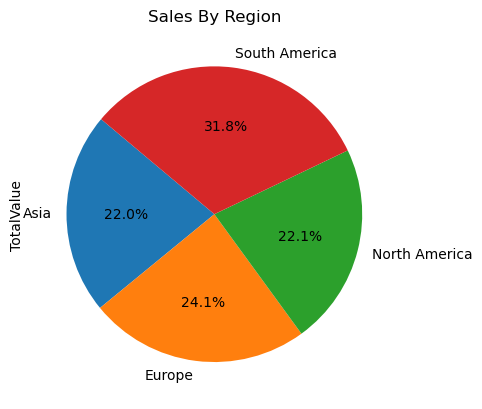

In [56]:
data.groupby('Region')['TotalValue'].sum().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title("Sales By Region")
plt.show()

In [29]:
data['year_month'] = data['TransactionDate'].dt.to_period('M')

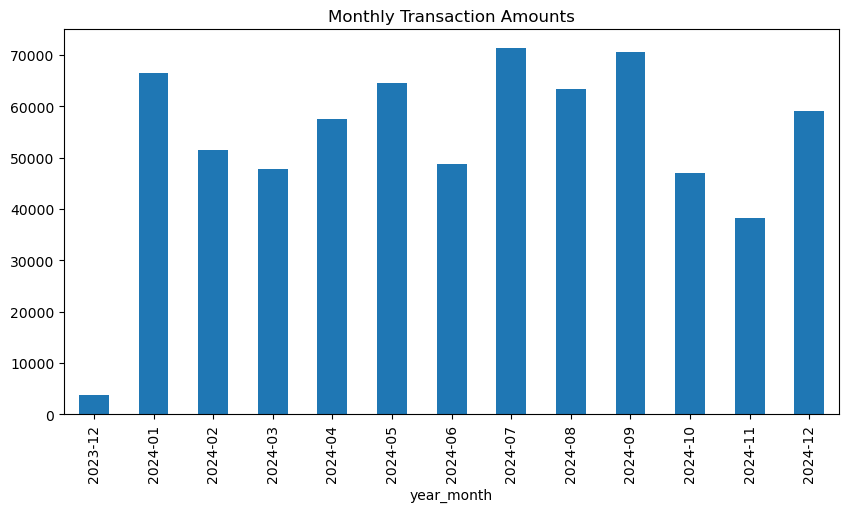

In [33]:
data.groupby('year_month')['TotalValue'].sum().plot(kind='bar', figsize=(10,5), title="Monthly Transaction Amounts")
plt.show()

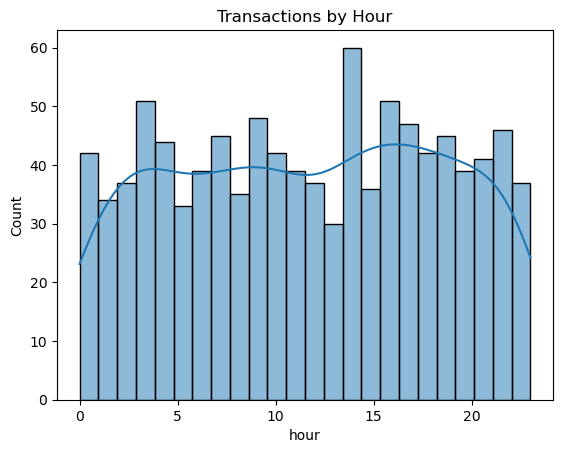

In [35]:
data['hour'] = data['TransactionDate'].dt.hour
sns.histplot(data['hour'], bins=24, kde=True)
plt.title("Transactions by Hour")
plt.show()

In [38]:
top_customers = data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_customers

CustomerID
141    10673.87
54      8040.39
65      7663.70
156     7634.45
82      7572.91
188     7111.32
59      7073.28
28      6819.57
99      6715.72
165     6708.10
Name: TotalValue, dtype: float64

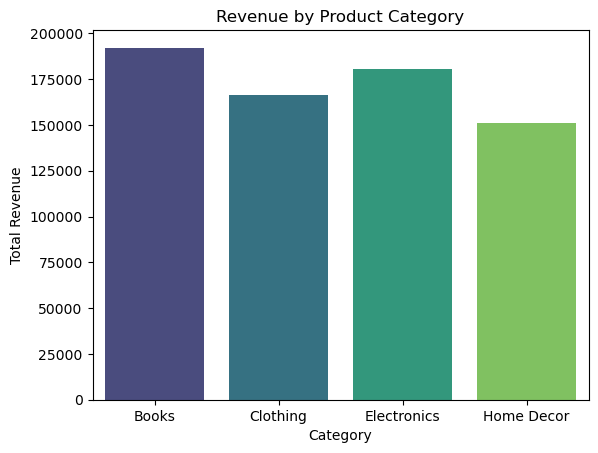

In [61]:
categoryByAmount=data.groupby('Category')['TotalValue'].sum()

sns.barplot(x=categoryByAmount.index, y=categoryByAmount.values, palette="viridis")
plt.title("Revenue by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.show()

In [68]:
num_data=data[['CustomerID', 'ProductID', 'TransactionID', 'Quantity', 'TotalValue', 'Product_price', 'hour']]

<Axes: >

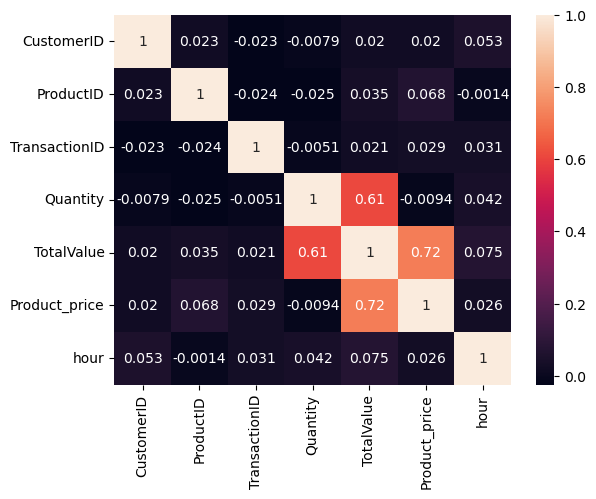

In [70]:
sns.heatmap(num_data.corr(), annot=True)

# Task 2

In [71]:
trans

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 8:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 2:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [72]:
cust

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [75]:
customer_spend = trans.groupby('CustomerID')['TotalValue'].agg(['sum', 'mean']).reset_index()
customer_spend.columns = ['CustomerID', 'total_spent', 'avg_spent']

In [80]:
df1 = cust.merge(customer_spend, on='CustomerID', how='left')


,CustomerID,CustomerName,Region,SignupDate,total_spent,avg_spent
0,C0001,Lawrence Carroll,South America,2022-07-10,3354.52,670.904000
1,C0002,Elizabeth Lutz,Asia,2022-02-13,1862.74,465.685000
2,C0003,Michael Rivera,South America,2024-03-07,2725.38,681.345000
3,C0004,Kathleen Rodriguez,South America,2022-10-09,5354.88,669.360000
4,C0005,Laura Weber,Asia,2022-08-15,2034.24,678.080000
...,...,...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07,4982.88,1245.720000
196,C0197,Christina Harvey,Europe,2023-03-21,1928.65,642.883333
197,C0198,Rebecca Ray,Europe,2022-02-27,931.83,465.915000
198,C0199,Andrea Jenkins,Europe,2022-12-03,1979.28,494.820000


In [81]:
df1.fillna(0, inplace=True)

In [88]:
df1.SignupDate=pd.to_datetime(df1.SignupDate)

In [92]:
df1['Month']=df1.SignupDate.dt.month
df1

,CustomerID,CustomerName,Region,SignupDate,total_spent,avg_spent,Month
0,C0001,Lawrence Carroll,South America,2022-07-10,3354.52,670.904000,7
1,C0002,Elizabeth Lutz,Asia,2022-02-13,1862.74,465.685000,2
2,C0003,Michael Rivera,South America,2024-03-07,2725.38,681.345000,3
3,C0004,Kathleen Rodriguez,South America,2022-10-09,5354.88,669.360000,10
4,C0005,Laura Weber,Asia,2022-08-15,2034.24,678.080000,8
...,...,...,...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07,4982.88,1245.720000,6
196,C0197,Christina Harvey,Europe,2023-03-21,1928.65,642.883333,3
197,C0198,Rebecca Ray,Europe,2022-02-27,931.83,465.915000,2
198,C0199,Andrea Jenkins,Europe,2022-12-03,1979.28,494.820000,12


In [93]:
features = ['total_spent', 'avg_spent', 'Month']
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1[features])

In [94]:
similarity_matrix = cosine_similarity(df1_scaled)

In [97]:
lookalike_dict = {}

for idx, cust_id in enumerate(df1['CustomerID'][:20]):

    scores = list(enumerate(similarity_matrix[idx]))
    
    scores = sorted(scores, key=lambda x: x[1], reverse=True)[1:4]
    
    lookalike_dict[cust_id] = [(df1.iloc[i[0]]['CustomerID'], round(i[1], 4)) for i in scores]

lookalike_df = pd.DataFrame(lookalike_dict.items(), columns=['CustomerID', 'lookalikes'])

lookalike_df.to_csv("Lookalike.csv", index=False)
print("Lookalike.csv saved successfully!")


Lookalike.csv saved successfully!


In [110]:
sam=pd.read_csv('Lookalike.csv')
sam.lookalikes=sam.lookalikes.tolist()

In [138]:
sam['1']=sam.lookalikes.apply(lambda x: x[1:18], x[20:37])
sam

,CustomerID,lookalikes,1,2,3
0,C0001,"[('C0069', 0.9988), ('C0174', 0.9977), ('C0055...","('C0069', 0.9988)","('C0174', 0.9977)","('C0055', 0.9965)"
1,C0002,"[('C0157', 0.9924), ('C0038', 0.9917), ('C0076...","('C0157', 0.9924)","('C0038', 0.9917)","('C0076', 0.9908)"
2,C0003,"[('C0052', 0.9837), ('C0133', 0.9829), ('C0167...","('C0052', 0.9837)","('C0133', 0.9829)","('C0167', 0.9762)"
3,C0004,"[('C0108', 0.9974), ('C0173', 0.9841), ('C0101...","('C0108', 0.9974)","('C0173', 0.9841)","('C0101', 0.9778)"
4,C0005,"[('C0073', 0.9992), ('C0159', 0.9983), ('C0144...","('C0073', 0.9992)","('C0159', 0.9983)","('C0144', 0.9977)"
5,C0006,"[('C0079', 0.9937), ('C0158', 0.976), ('C0037'...","('C0079', 0.9937)","('C0158', 0.976),","('C0037', 0.9568)]"
6,C0007,"[('C0140', 0.9682), ('C0020', 0.9313), ('C0089...","('C0140', 0.9682)","('C0020', 0.9313)","('C0089', 0.9152)"
7,C0008,"[('C0024', 0.9807), ('C0139', 0.9784), ('C0081...","('C0024', 0.9807)","('C0139', 0.9784)","('C0081', 0.935)]"
8,C0009,"[('C0033', 0.9969), ('C0025', 0.9954), ('C0180...","('C0033', 0.9969)","('C0025', 0.9954)","('C0180', 0.9894)"
9,C0010,"[('C0086', 0.9966), ('C0199', 0.9929), ('C0111...","('C0086', 0.9966)","('C0199', 0.9929)","('C0111', 0.99)]"


In [134]:
sam['2']=sam.lookalikes.apply(lambda x: x[20:37])


,CustomerID,lookalikes,1,2
0,C0001,"[('C0069', 0.9988), ('C0174', 0.9977), ('C0055...","('C0069', 0.9988)","('C0174', 0.9977)"
1,C0002,"[('C0157', 0.9924), ('C0038', 0.9917), ('C0076...","('C0157', 0.9924)","('C0038', 0.9917)"
2,C0003,"[('C0052', 0.9837), ('C0133', 0.9829), ('C0167...","('C0052', 0.9837)","('C0133', 0.9829)"
3,C0004,"[('C0108', 0.9974), ('C0173', 0.9841), ('C0101...","('C0108', 0.9974)","('C0173', 0.9841)"
4,C0005,"[('C0073', 0.9992), ('C0159', 0.9983), ('C0144...","('C0073', 0.9992)","('C0159', 0.9983)"
5,C0006,"[('C0079', 0.9937), ('C0158', 0.976), ('C0037'...","('C0079', 0.9937)","('C0158', 0.976),"
6,C0007,"[('C0140', 0.9682), ('C0020', 0.9313), ('C0089...","('C0140', 0.9682)","('C0020', 0.9313)"
7,C0008,"[('C0024', 0.9807), ('C0139', 0.9784), ('C0081...","('C0024', 0.9807)","('C0139', 0.9784)"
8,C0009,"[('C0033', 0.9969), ('C0025', 0.9954), ('C0180...","('C0033', 0.9969)","('C0025', 0.9954)"
9,C0010,"[('C0086', 0.9966), ('C0199', 0.9929), ('C0111...","('C0086', 0.9966)","('C0199', 0.9929)"


In [152]:
sam['3']=sam.lookalikes.apply(lambda x: x[38:56])

In [145]:
sam.rename(columns={'1':'1_lookalikes','2':'2_lookalikes','3':'3_lookalikes'})

,CustomerID,lookalikes,1_lookalikes,2_lookalikes,3_lookalikes
0,C0001,"[('C0069', 0.9988), ('C0174', 0.9977), ('C0055...","('C0069', 0.9988)","('C0174', 0.9977)","('C0055', 0.9965)"
1,C0002,"[('C0157', 0.9924), ('C0038', 0.9917), ('C0076...","('C0157', 0.9924)","('C0038', 0.9917)","('C0076', 0.9908)"
2,C0003,"[('C0052', 0.9837), ('C0133', 0.9829), ('C0167...","('C0052', 0.9837)","('C0133', 0.9829)","('C0167', 0.9762)"
3,C0004,"[('C0108', 0.9974), ('C0173', 0.9841), ('C0101...","('C0108', 0.9974)","('C0173', 0.9841)","('C0101', 0.9778)"
4,C0005,"[('C0073', 0.9992), ('C0159', 0.9983), ('C0144...","('C0073', 0.9992)","('C0159', 0.9983)","('C0144', 0.9977)"
5,C0006,"[('C0079', 0.9937), ('C0158', 0.976), ('C0037'...","('C0079', 0.9937)","('C0158', 0.976),","('C0037', 0.9568)]"
6,C0007,"[('C0140', 0.9682), ('C0020', 0.9313), ('C0089...","('C0140', 0.9682)","('C0020', 0.9313)","('C0089', 0.9152)"
7,C0008,"[('C0024', 0.9807), ('C0139', 0.9784), ('C0081...","('C0024', 0.9807)","('C0139', 0.9784)","('C0081', 0.935)]"
8,C0009,"[('C0033', 0.9969), ('C0025', 0.9954), ('C0180...","('C0033', 0.9969)","('C0025', 0.9954)","('C0180', 0.9894)"
9,C0010,"[('C0086', 0.9966), ('C0199', 0.9929), ('C0111...","('C0086', 0.9966)","('C0199', 0.9929)","('C0111', 0.99)]"


In [148]:
sam.drop('lookalikes',axis=1,inplace=True)

In [153]:
sam

,CustomerID,1,2,3
0,C0001,"('C0069', 0.9988)","('C0174', 0.9977)","('C0055', 0.9965)"
1,C0002,"('C0157', 0.9924)","('C0038', 0.9917)","('C0076', 0.9908)"
2,C0003,"('C0052', 0.9837)","('C0133', 0.9829)","('C0167', 0.9762)"
3,C0004,"('C0108', 0.9974)","('C0173', 0.9841)","('C0101', 0.9778)"
4,C0005,"('C0073', 0.9992)","('C0159', 0.9983)","('C0144', 0.9977)"
5,C0006,"('C0079', 0.9937)","('C0158', 0.976),","('C0037', 0.9568)]"
6,C0007,"('C0140', 0.9682)","('C0020', 0.9313)","('C0089', 0.9152)"
7,C0008,"('C0024', 0.9807)","('C0139', 0.9784)","('C0081', 0.935)]"
8,C0009,"('C0033', 0.9969)","('C0025', 0.9954)","('C0180', 0.9894)"
9,C0010,"('C0086', 0.9966)","('C0199', 0.9929)","('C0111', 0.99)]"


Above 1,2,3 are 3 similar customers and there coresponding percentage of similatity.

# Task 3

In [20]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore") 

In [2]:
customers = pd.read_csv("Customers.csv")

transactions = pd.read_csv("Transactions.csv")

In [4]:
df2 = pd.merge(customers, transactions, on="CustomerID")
df2

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 3:12:55,2,114.60,57.30
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 9:01:18,3,412.62,137.54
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 0:01:00,2,614.94,307.47
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 3:11:44,2,911.44,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64
...,...,...,...,...,...,...,...,...,...,...
995,C0200,Kelly Cross,Asia,2023-06-11,T00518,P034,2024-12-11 3:05:50,4,868.20,217.05
996,C0200,Kelly Cross,Asia,2023-06-11,T00091,P057,2024-04-27 19:06:20,1,239.70,239.70
997,C0200,Kelly Cross,Asia,2023-06-11,T00731,P061,2024-07-15 20:36:28,4,627.84,156.96
998,C0200,Kelly Cross,Asia,2023-06-11,T00771,P048,2024-09-10 9:50:48,4,1665.60,416.40


In [5]:
df2.drop(columns=["CustomerID"], inplace=True)

In [6]:
df2 = pd.get_dummies(df2, drop_first=True)

In [7]:
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2)

In [21]:
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df2_scaled)
    wcss.append(kmeans.inertia_)

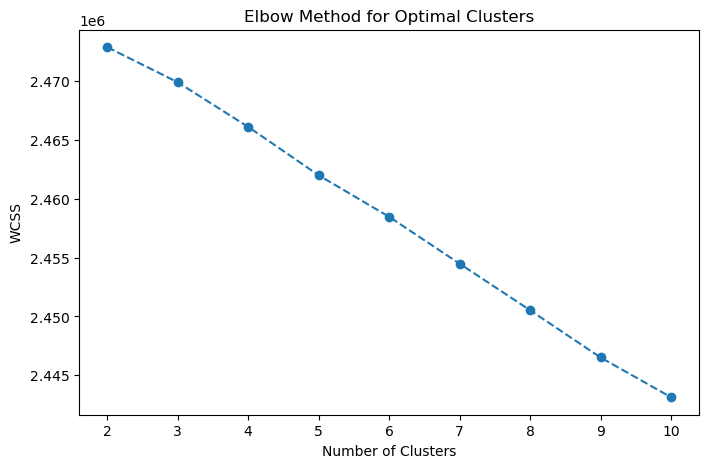

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

In [22]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df2['Cluster'] = kmeans.fit_predict(df2_scaled)

In [14]:
db_index = davies_bouldin_score(df2_scaled, df2['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 4.781291763528034


In [15]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df2_scaled)
df2["PCA1"] = df_pca[:, 0]
df2["PCA2"] = df_pca[:, 1]

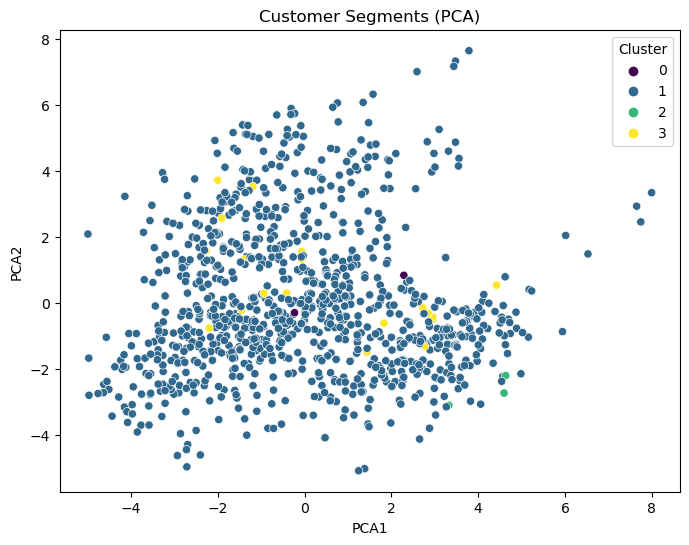

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue=df2["Cluster"], palette="viridis", data=df2)
plt.title("Customer Segments (PCA)")
plt.show()

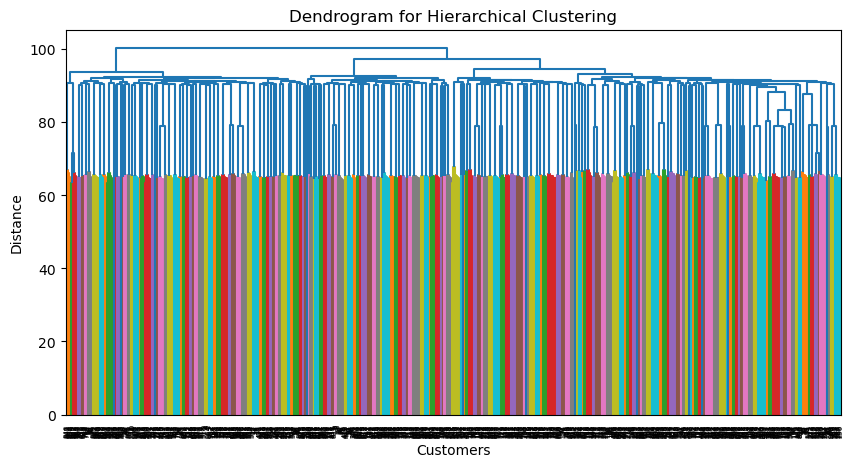

In [18]:
linked = linkage(df2_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

In [19]:
df2['Cluster'] = kmeans.labels_ 

num_clusters = df2['Cluster'].nunique()
print(f"Number of clusters formed: {num_clusters}")

Number of clusters formed: 4
